In [1]:
# ignore warnings :
import warnings
warnings.filterwarnings('ignore')


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use('fivethirtyeight')


In [2]:
df= pd.read_excel("kl.xls")

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,Ä226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,Ä127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,Ä228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,Ä138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,Ä196.4M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18206 non-null  float64
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18206 non-null  float64
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
df.shape

(18207, 89)

In [6]:
#to check the columns by name 
df.columns


Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
# drop redundant columns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [9]:
# check for missing values
df.isnull().sum()

ID                   0
Name                 0
Age                  1
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [10]:
# fill missing values for continuous variables for proper data visualization
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [11]:
df.fillna(0, inplace = True)


In [12]:
df.isnull().sum()

ID                0
Name              0
Age               0
Photo             0
Nationality       0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 88, dtype: int64

In [13]:
df['Preferred Foot'].value_counts()

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

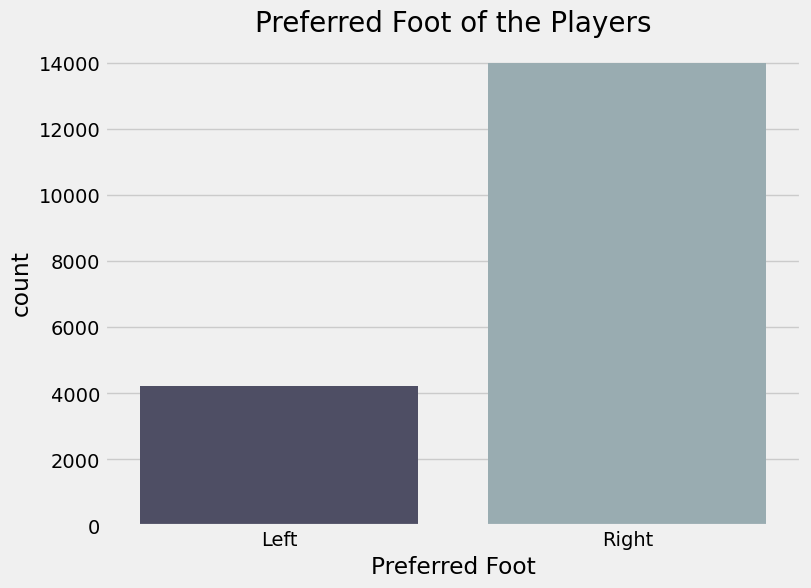

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(df['Preferred Foot'], palette = 'bone')
plt.title('Preferred Foot of the Players', fontsize = 20)
plt.show()

In [15]:
df['Preferred Foot'].value_counts()/len(df)

Right    0.768715
Left     0.231285
Name: Preferred Foot, dtype: float64

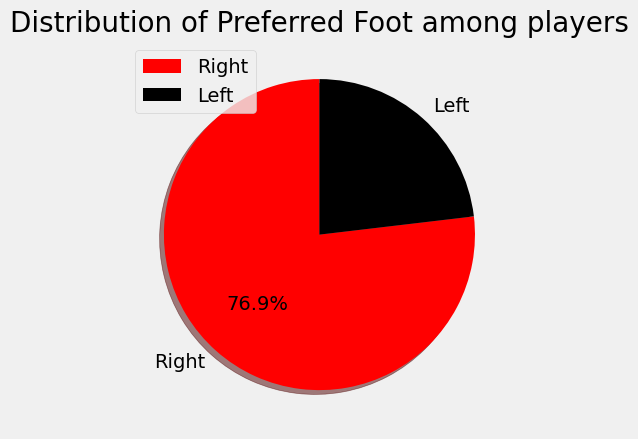

In [16]:
labels = df['Preferred Foot'].value_counts().index
size = df['Preferred Foot'].value_counts()
colors=['red','black']
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Preferred Foot among players', fontsize = 20)
plt.legend()
plt.show()
# alternate way below

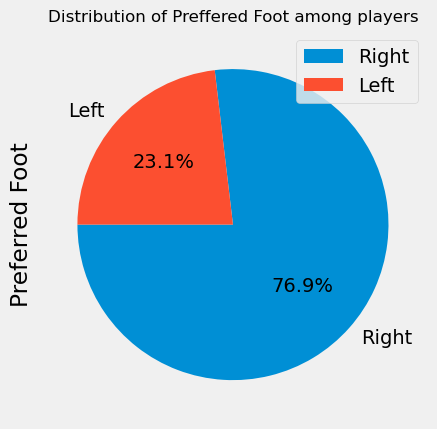

In [17]:
df['Preferred Foot'].value_counts().plot(kind="pie",autopct='%1.1f%%',startangle = 180)
#autopct used to show the precentage and straight agle for alignments 
plt.title('Distribution of Preffered Foot among players', fontsize = 12)
plt.legend()



In [18]:
df['Weak Foot'].value_counts()

3.0    11397
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

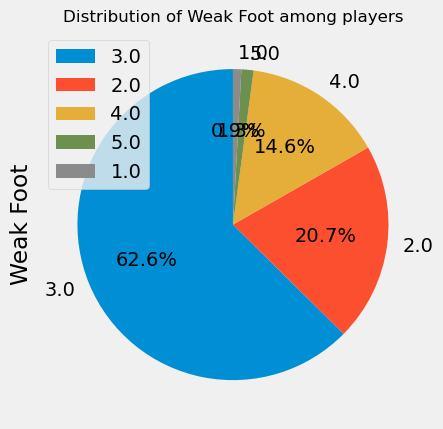

In [19]:
df['Weak Foot'].value_counts().plot(kind="pie",autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Weak Foot among players', fontsize = 12)
plt.legend()
#plt.show()

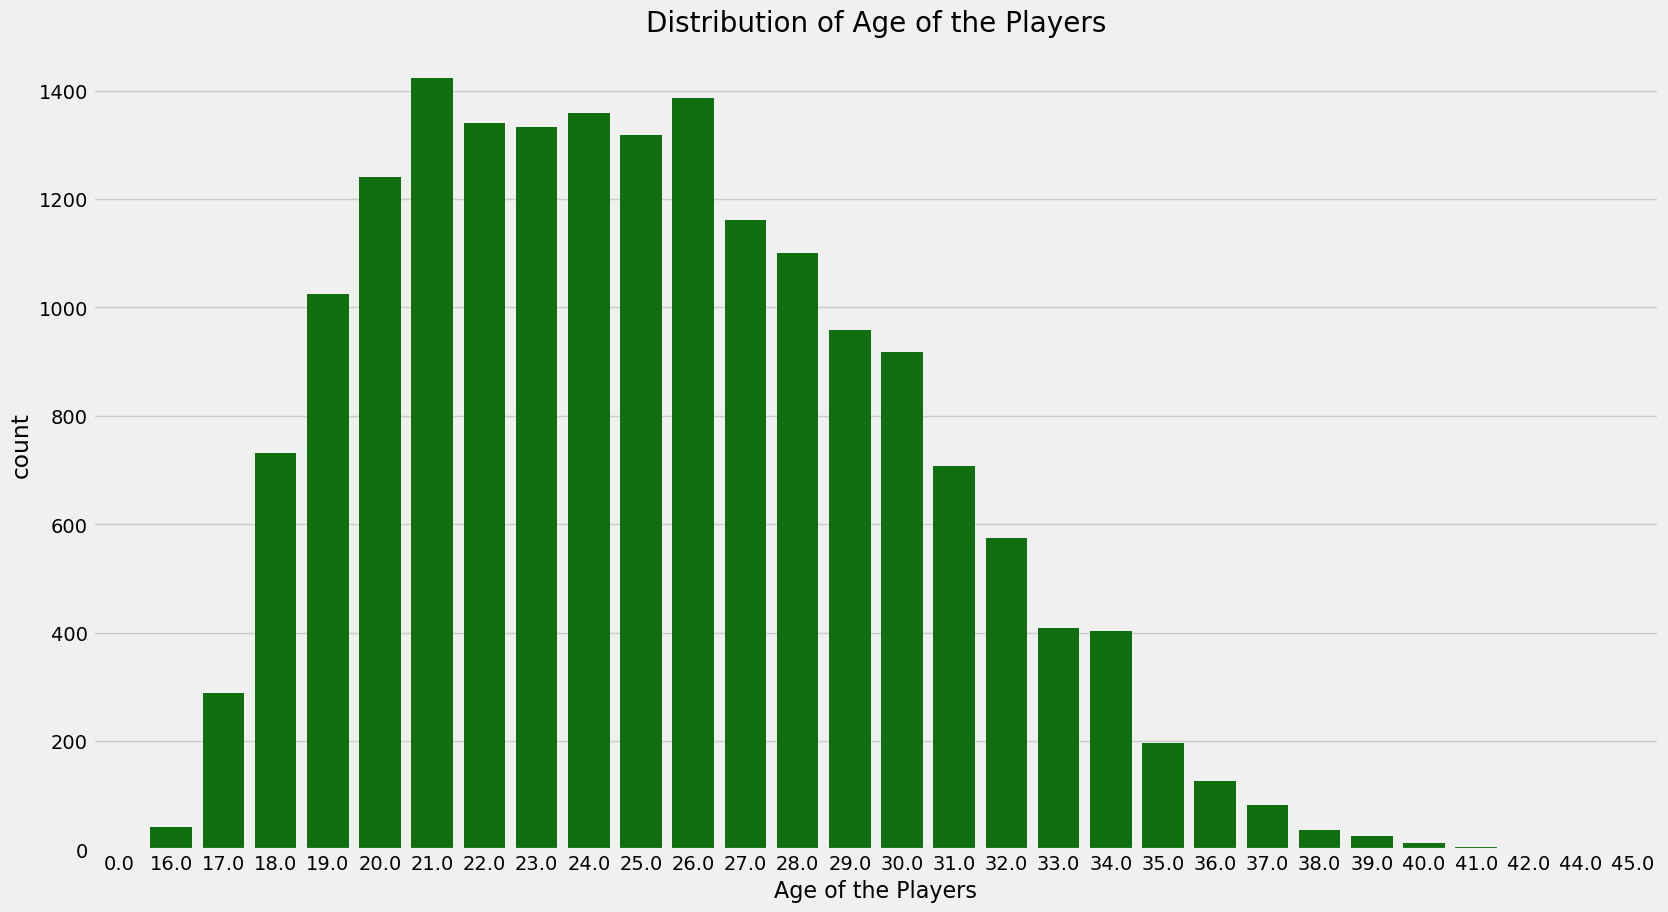

In [20]:
x = df['Age']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'age of the players')

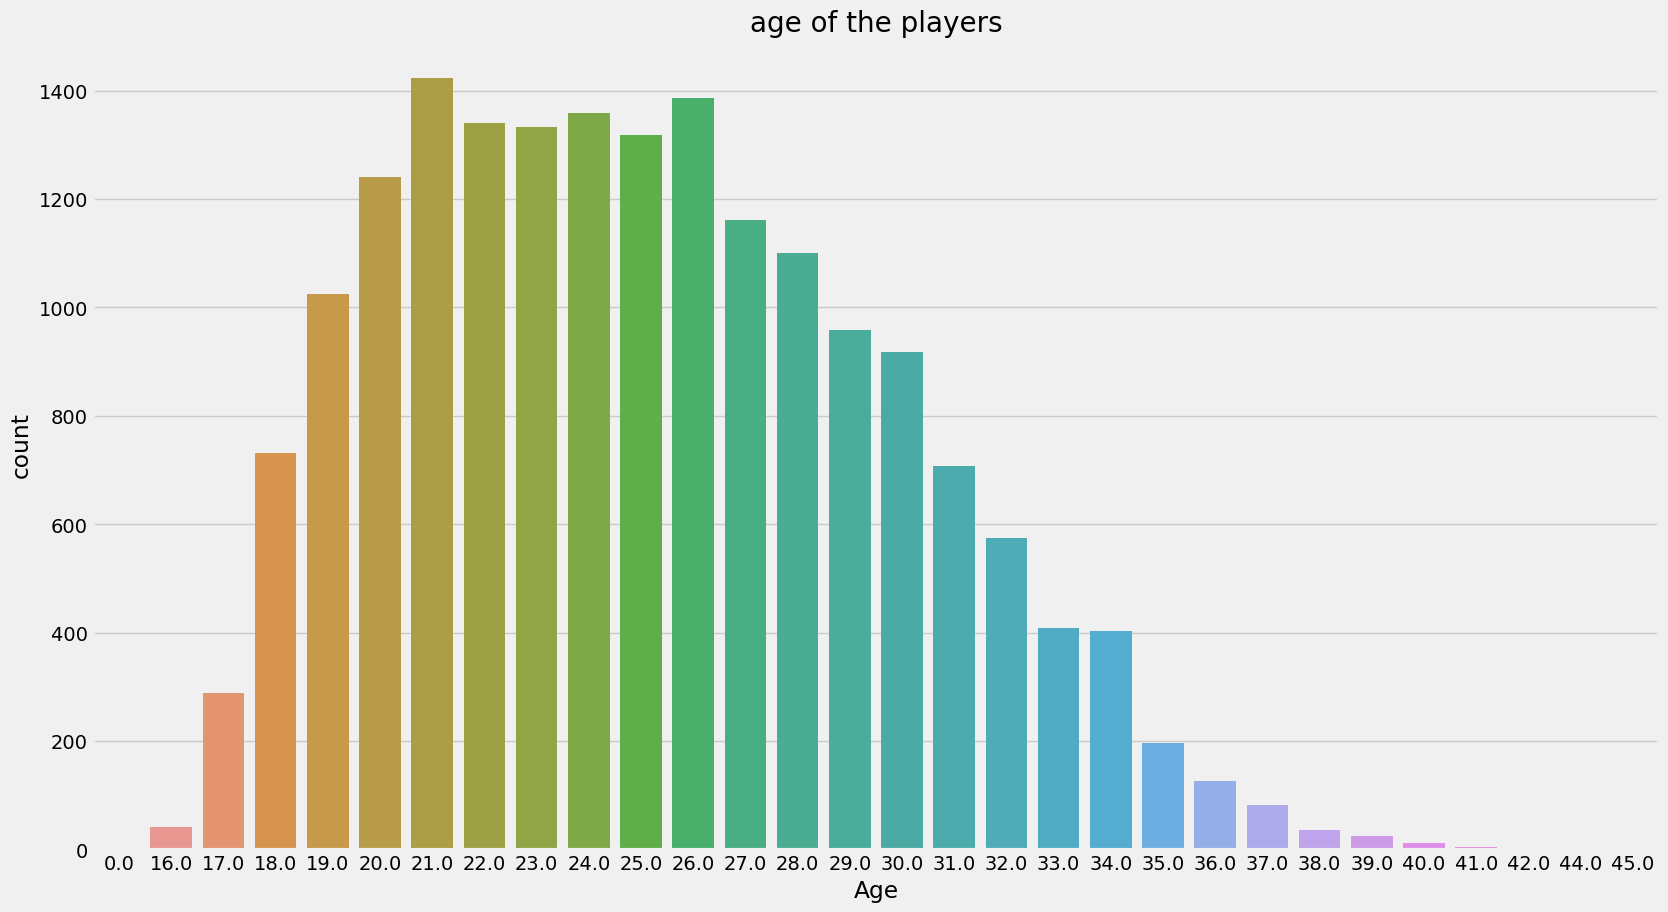

In [21]:
plt.figure(figsize=(18,10))
sns.countplot(x ='Age', data = df )
plt.title('age of the players', fontsize = 20)

# alternate way below

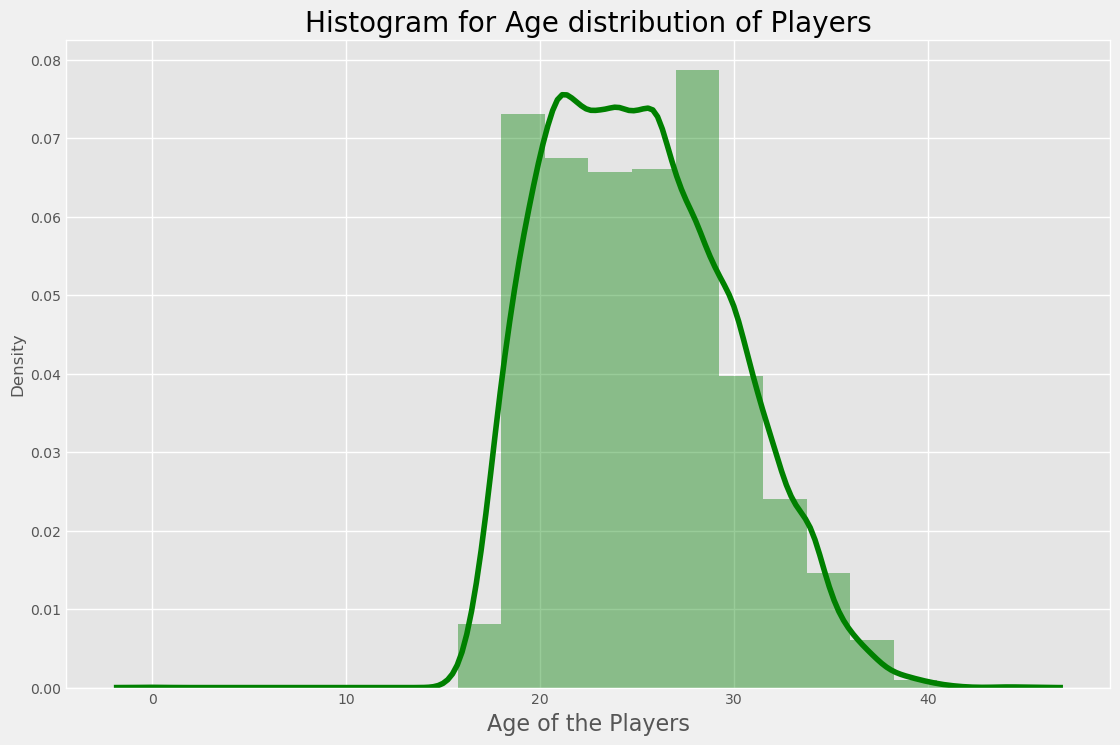

In [22]:
x = df['Age']
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 20, kde = True, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Histogram for Age distribution of Players', fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

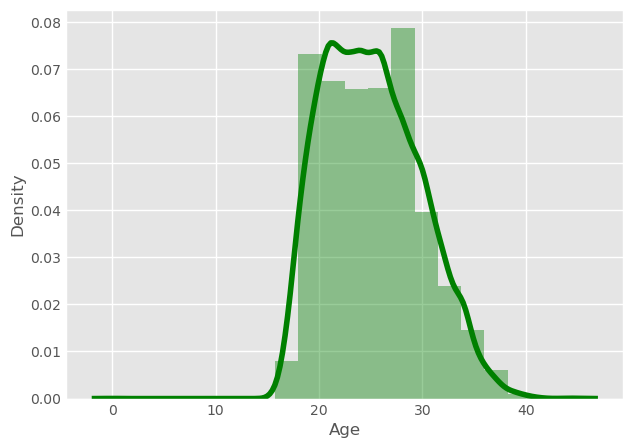

In [23]:
sns.distplot(x, bins = 20, kde = True, color='g')

### Visualize International Reputation
Q. How can we track international reputation of players.

A. We can track international reputation of players as follows 

In [24]:
df['International Reputation'].value_counts()


1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

Text(0.5, 1.0, 'International Reputation of the Players')

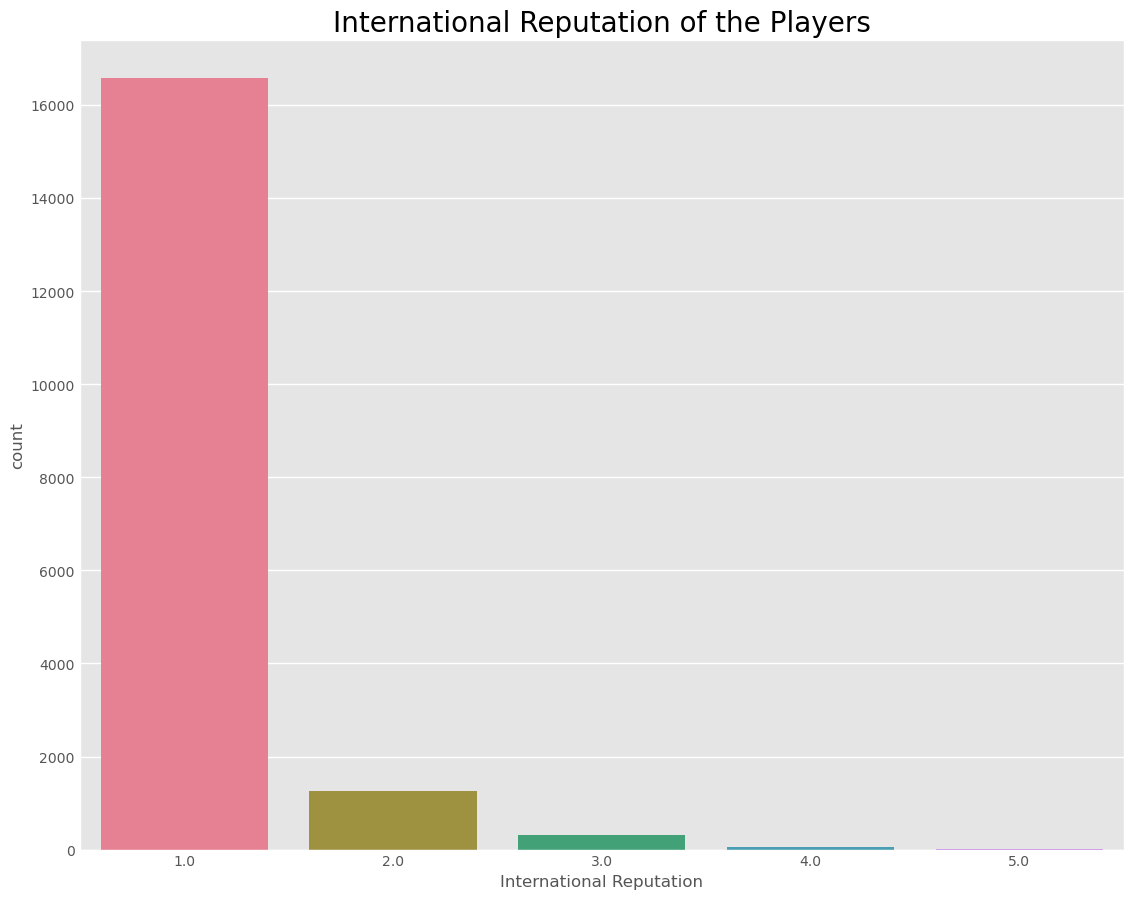

In [25]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], palette = 'husl')
plt.title('International Reputation of the Players', fontsize = 20)
#alternate way below

Text(0.5, 1.0, 'International Reputation of the Players')

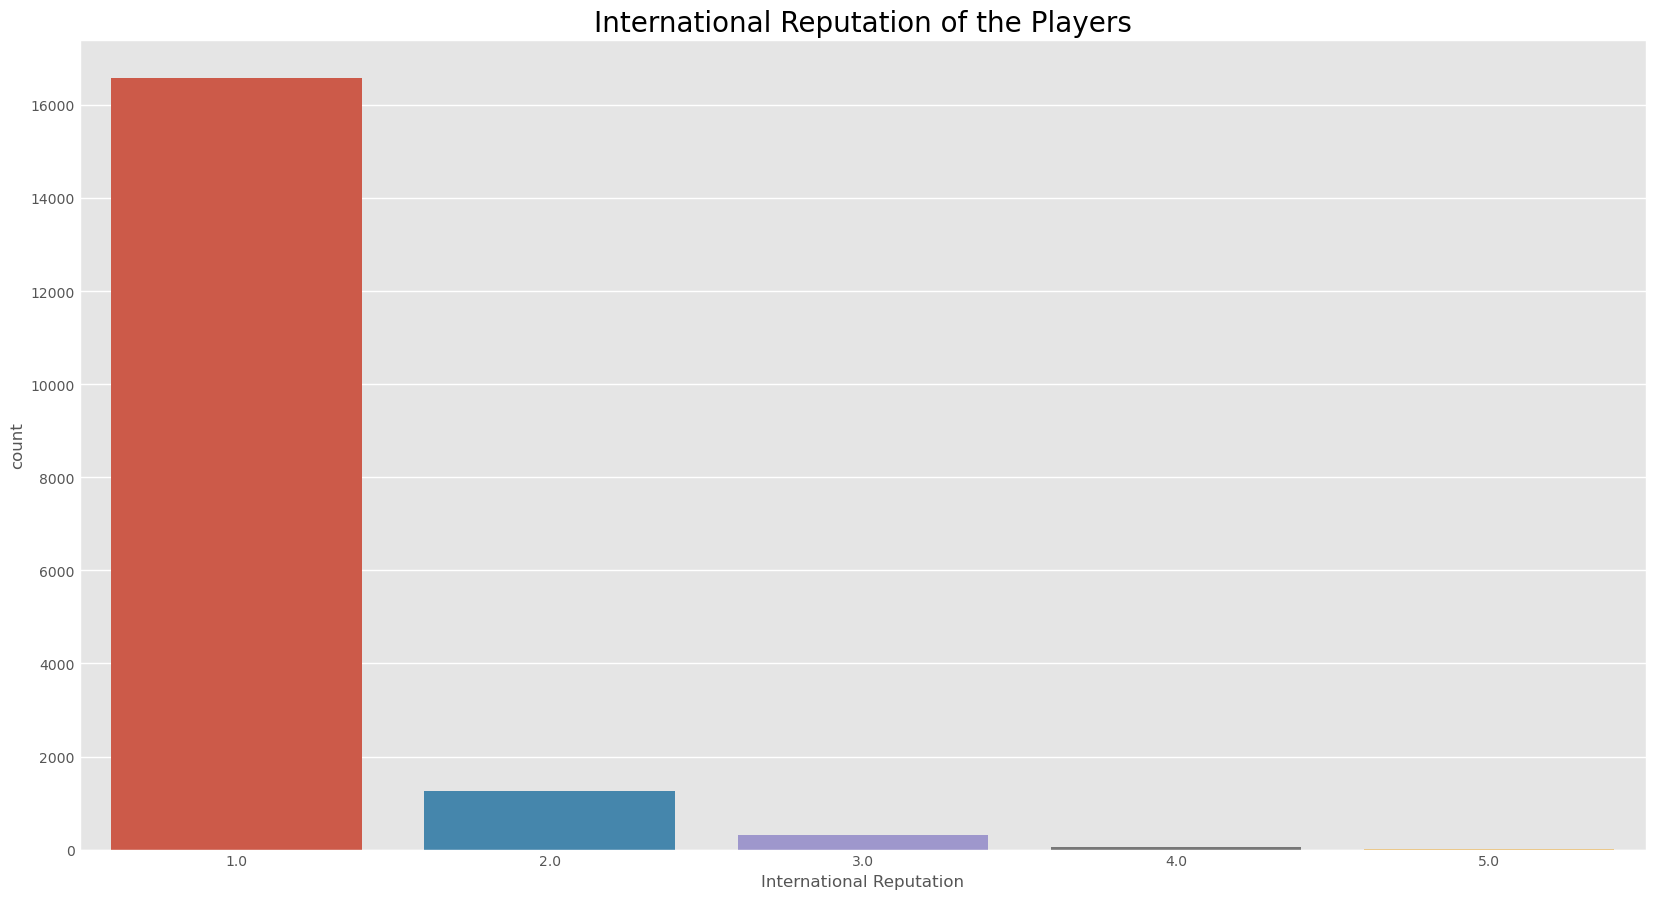

In [26]:
plt.figure(figsize=(18,10))
sns.countplot('International Reputation', data = df )
plt.title('International Reputation of the Players', fontsize = 20)

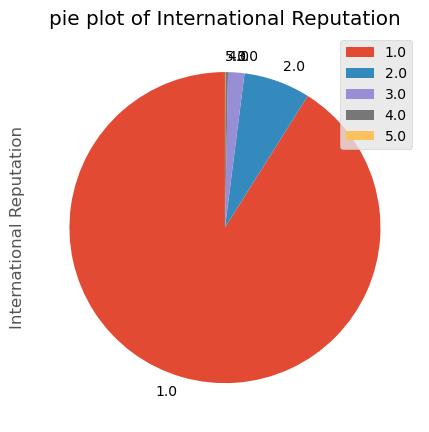

In [27]:
df['International Reputation'].value_counts().plot(kind="pie" ,startangle = 90 )
plt.title("pie plot of International Reputation")
plt.legend()
#pie plot 

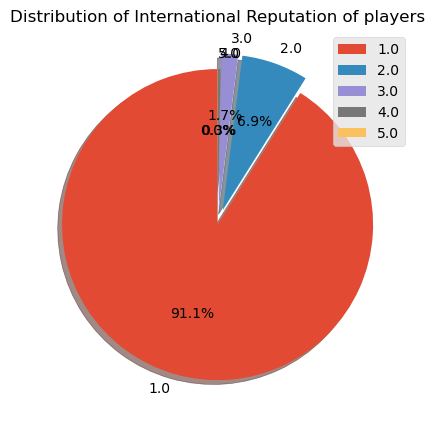

In [28]:
labels = df['International Reputation'].value_counts().index
size = df['International Reputation'].value_counts()
explode = [0, 0.1, 0.1, 0, 0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of International Reputation of players', fontsize = 12)
plt.legend()
plt.show()

### Q. What is the international reputation of left and right footed players?

A. The international reputation of left and right footed players can be given as follows -



In [29]:
df.groupby('Preferred Foot')['International Reputation'].value_counts()


Preferred Foot  International Reputation
Left            1.0                          3839
                2.0                           290
                3.0                            66
                4.0                            15
                5.0                             1
Right           1.0                         12741
                2.0                           971
                3.0                           243
                4.0                            36
                5.0                             5
Name: International Reputation, dtype: int64

<AxesSubplot:xlabel='International Reputation', ylabel='count'>

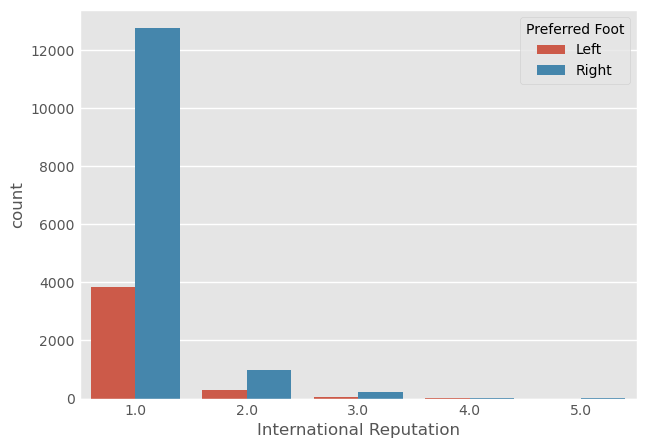

In [30]:
sns.countplot(df['International Reputation'], hue=df['Preferred Foot'])

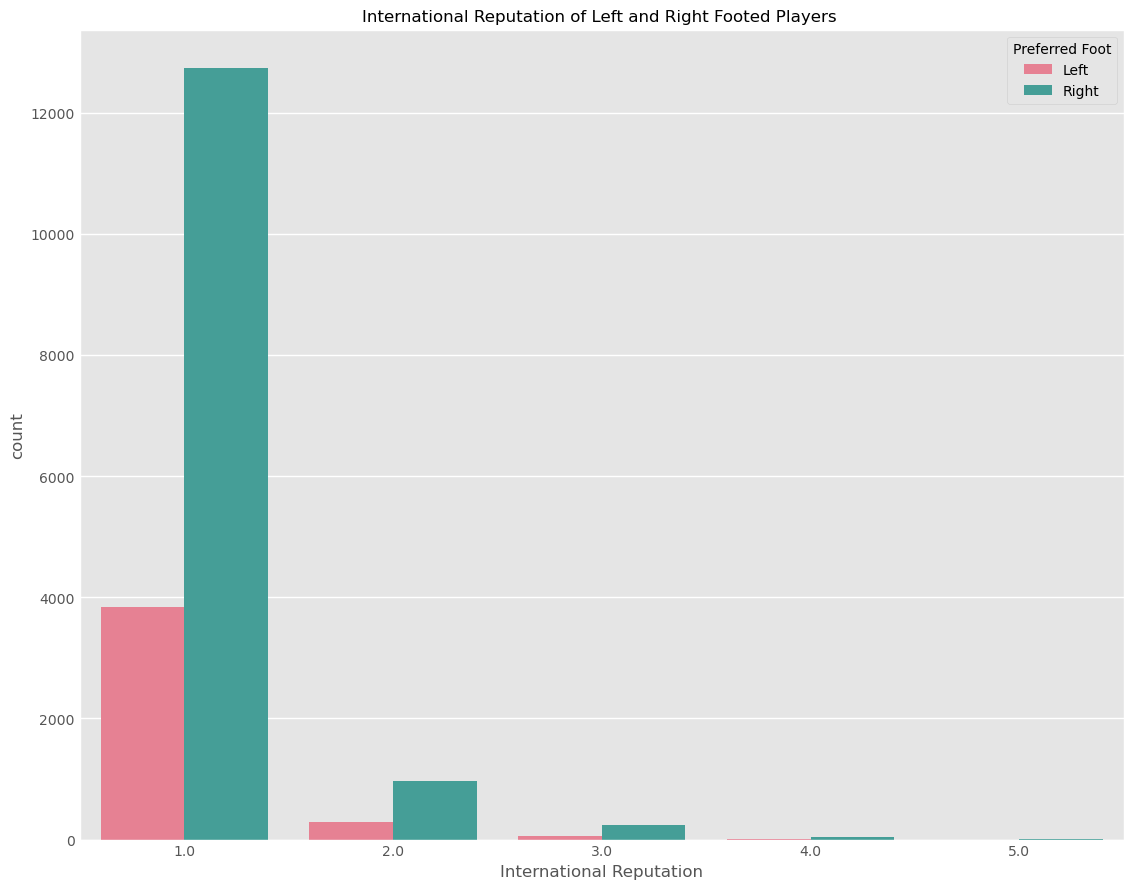

In [31]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], hue=df['Preferred Foot'], palette = 'husl')
plt.title('International Reputation of Left and Right Footed Players ', fontsize = 12)
plt.show()

### Work Rate of the Players
Q. What is the different work rate of the players?

A. The different work rate of the players can be given as follows -

In [32]:
df['Work Rate'].value_counts()


Medium/ Medium    9858
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

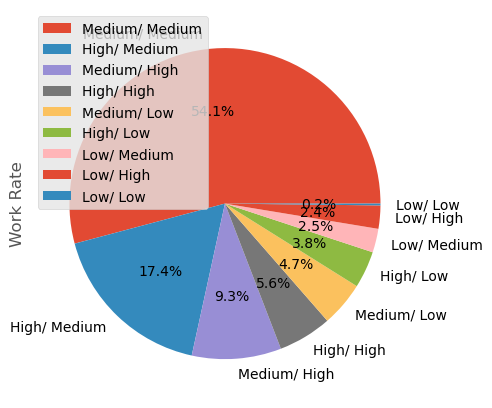

In [33]:
df['Work Rate'].value_counts().plot(kind="pie" ,autopct='%1.1f%%' )
plt.legend()


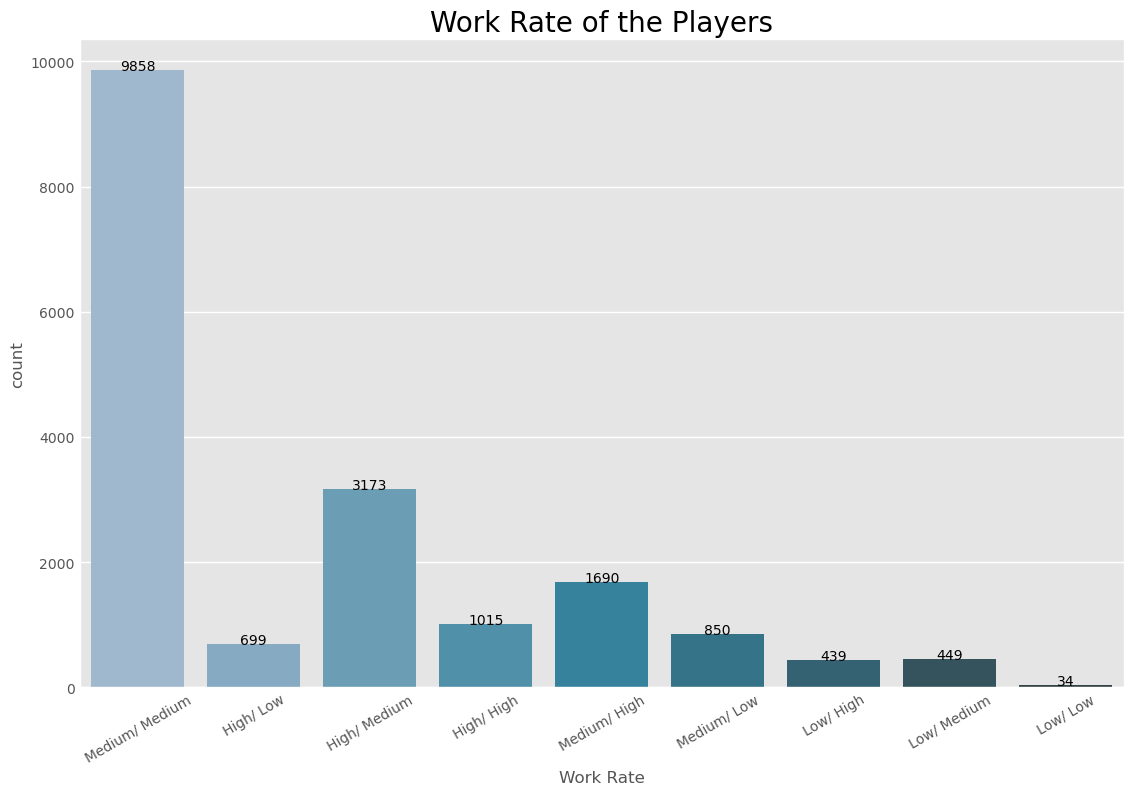

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, palette = 'PuBuGn_d')
graph.set_title('Work Rate of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### Q. How can we visualze work rate of players segregated by preferred foot?

A. We can visualize work rate of players segregated by preferred foot as follows-

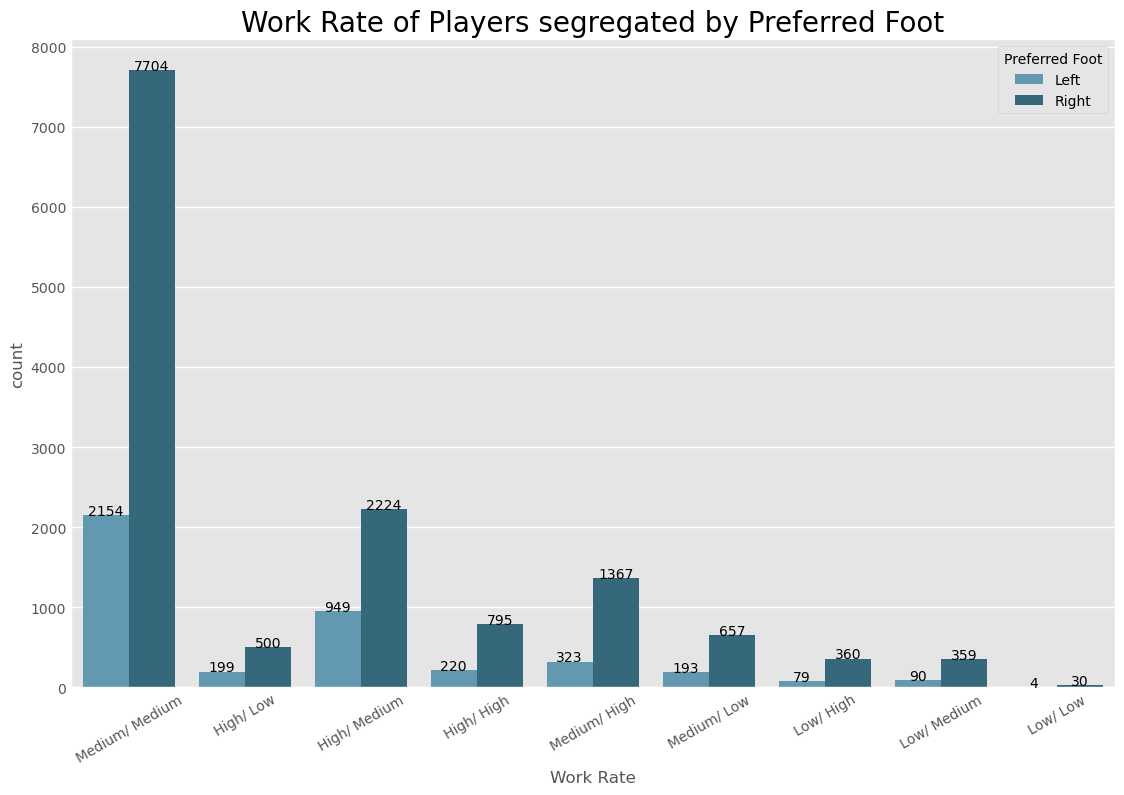

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Work Rate of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


### Skill Moves of the Players
Q. What is the different skill moves of the players?

A. The different work rate of the players can be given as follows -

In [36]:
df['Skill Moves'].value_counts()


2.0    8613
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: Skill Moves, dtype: int64

<AxesSubplot:xlabel='Skill Moves', ylabel='count'>

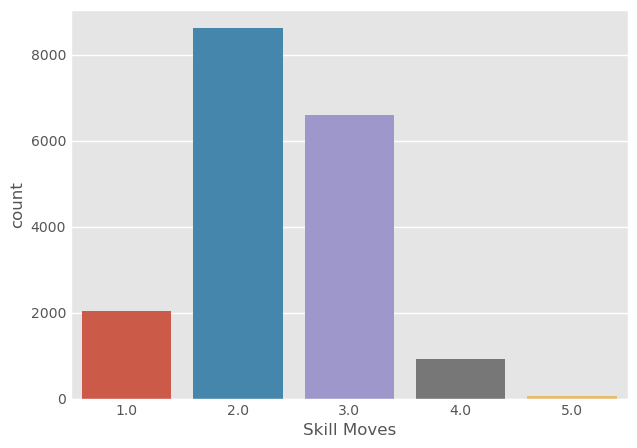

In [37]:
sns.countplot(x='Skill Moves', data=df)
#Simplified / complex way are below 

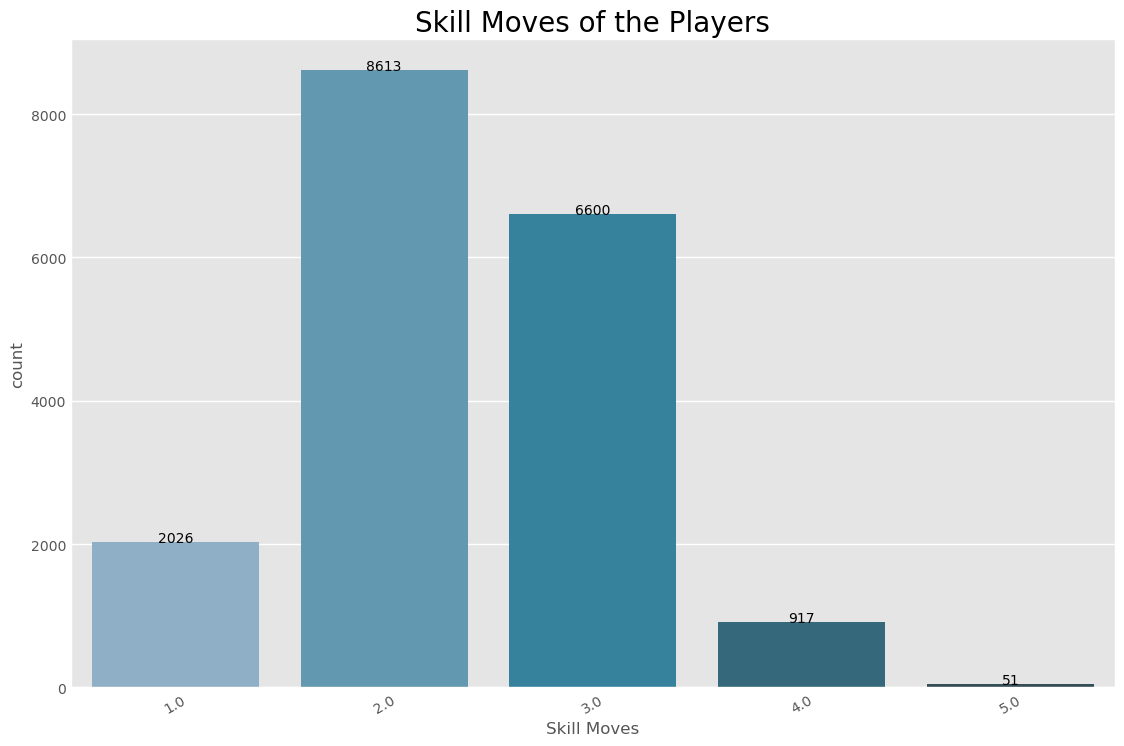

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, palette = 'PuBuGn_d')
graph.set_title('Skill Moves of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### Q. How can we visualze skill moves of players segregated by preferred foot?

A. We can visualize skill moves of players segregated by preferred foot as follows-

<AxesSubplot:xlabel='Skill Moves', ylabel='count'>

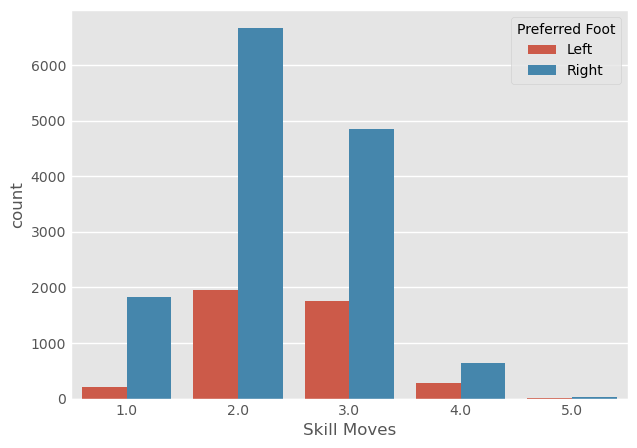

In [39]:
sns.countplot(x='Skill Moves',hue= "Preferred Foot" , data=df)
#simplefied way is below

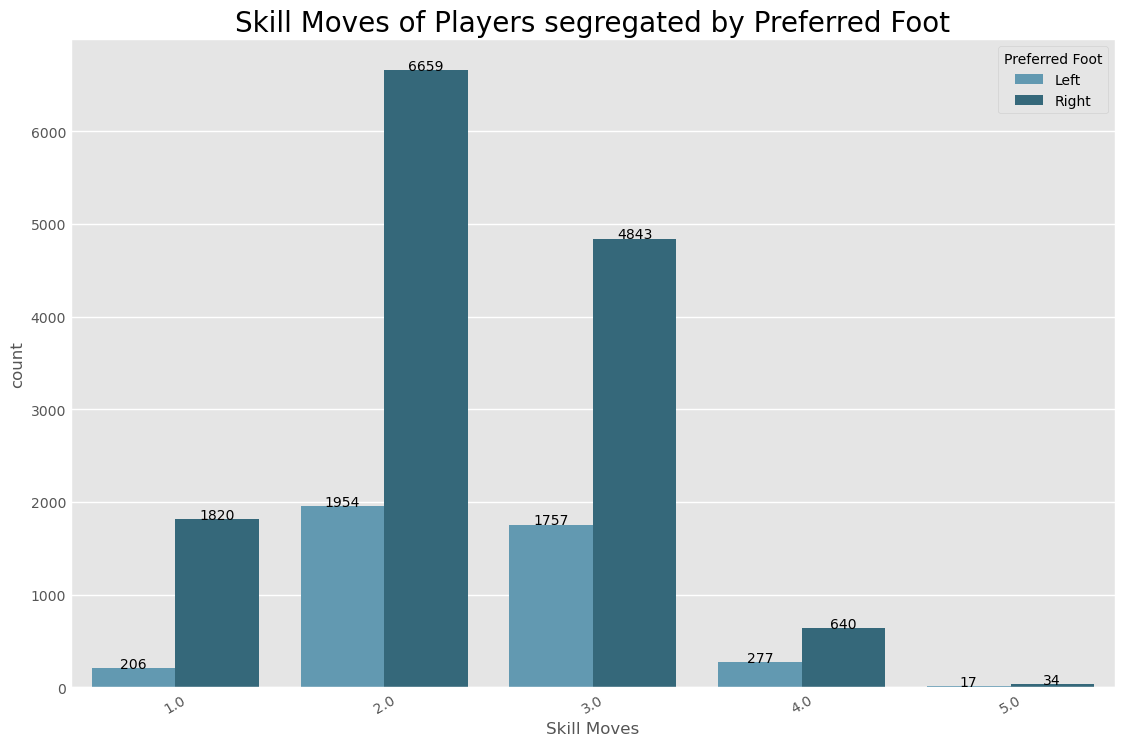

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Skill Moves of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### Special Score of the Players


<AxesSubplot:xlabel='Special', ylabel='count'>

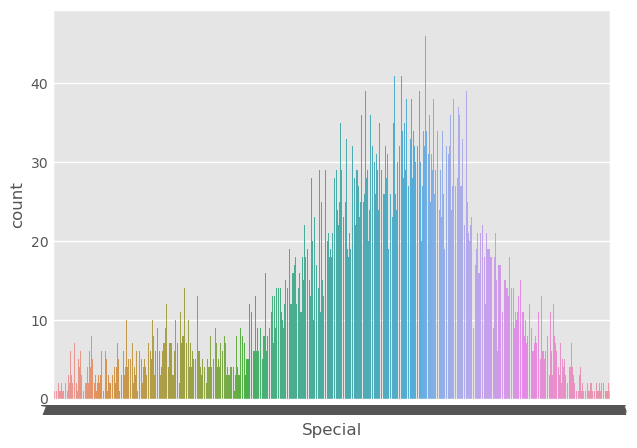

In [41]:
sns.countplot(x='Special', data=df)


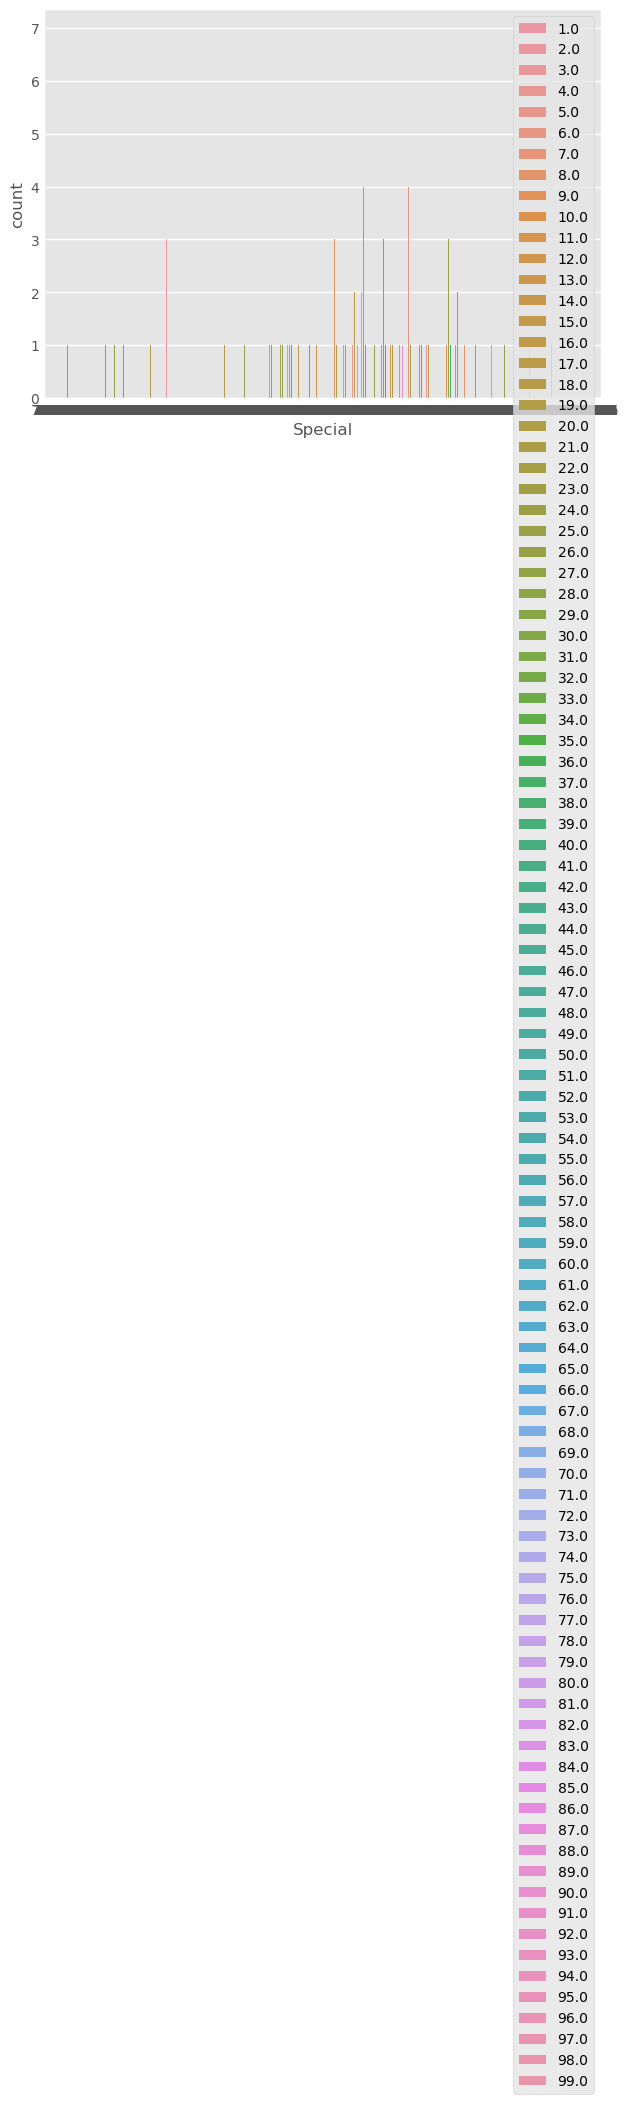

In [42]:
sns.countplot(x='Special',hue= "Jersey Number", data=df)
plt.legend()
plt.show()

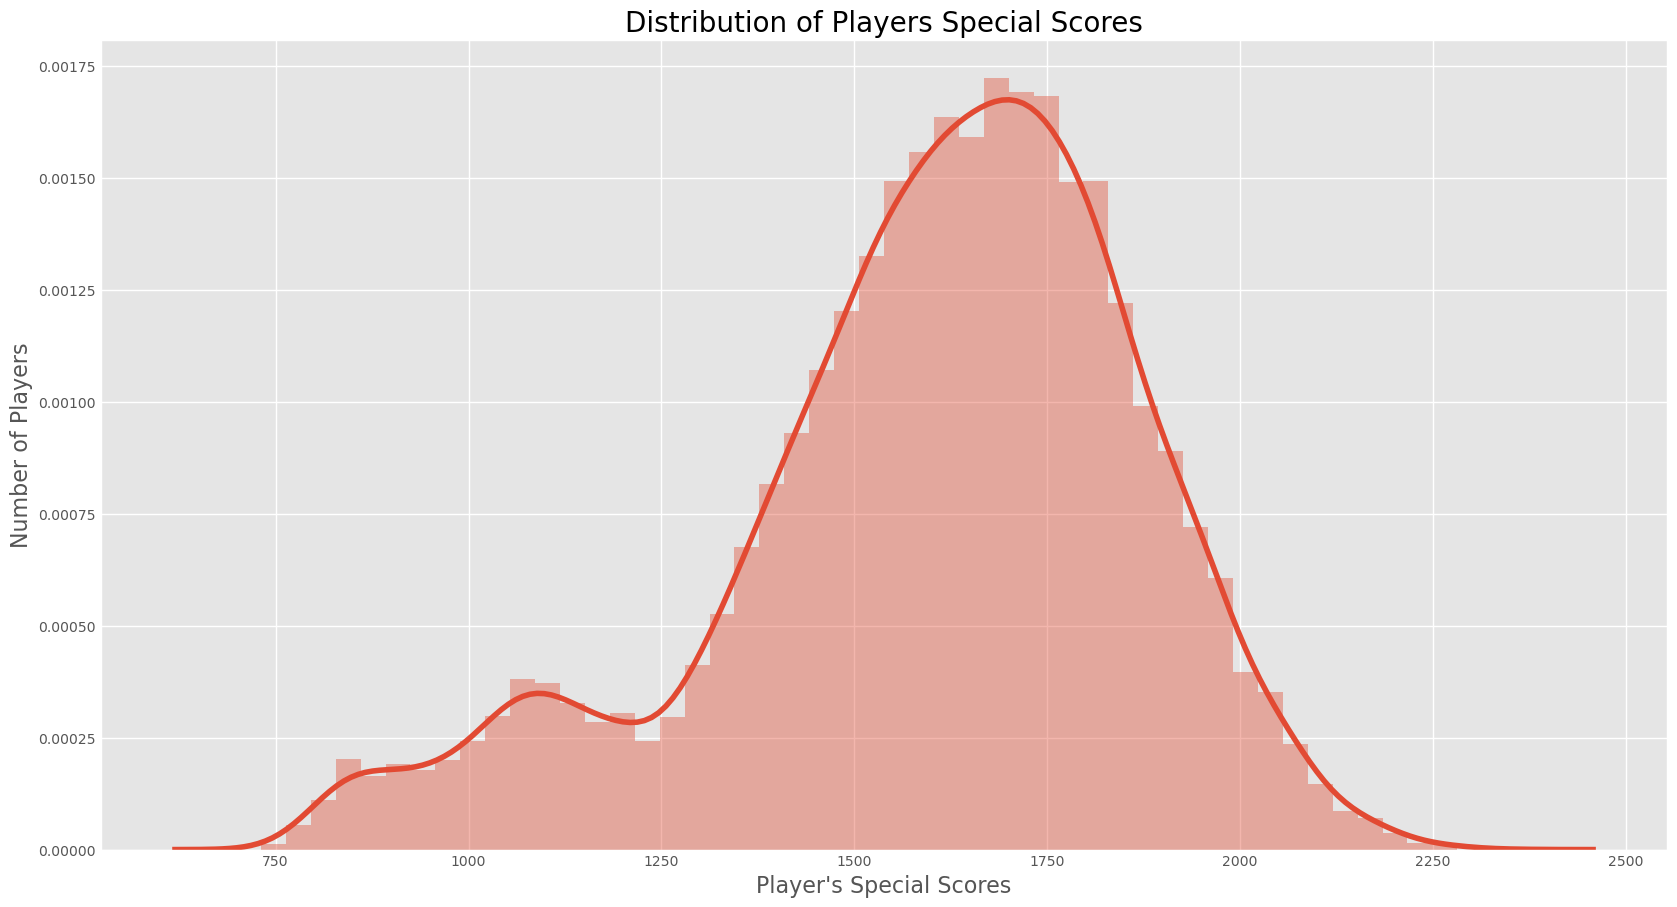

In [43]:
x = df['Special']
plt.figure(figsize=(18,10))
ax = sns.distplot(x)
ax.set_xlabel(xlabel = "Player's Special Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Special Scores', fontsize = 20)
plt.show()

### Potential Score of the Players


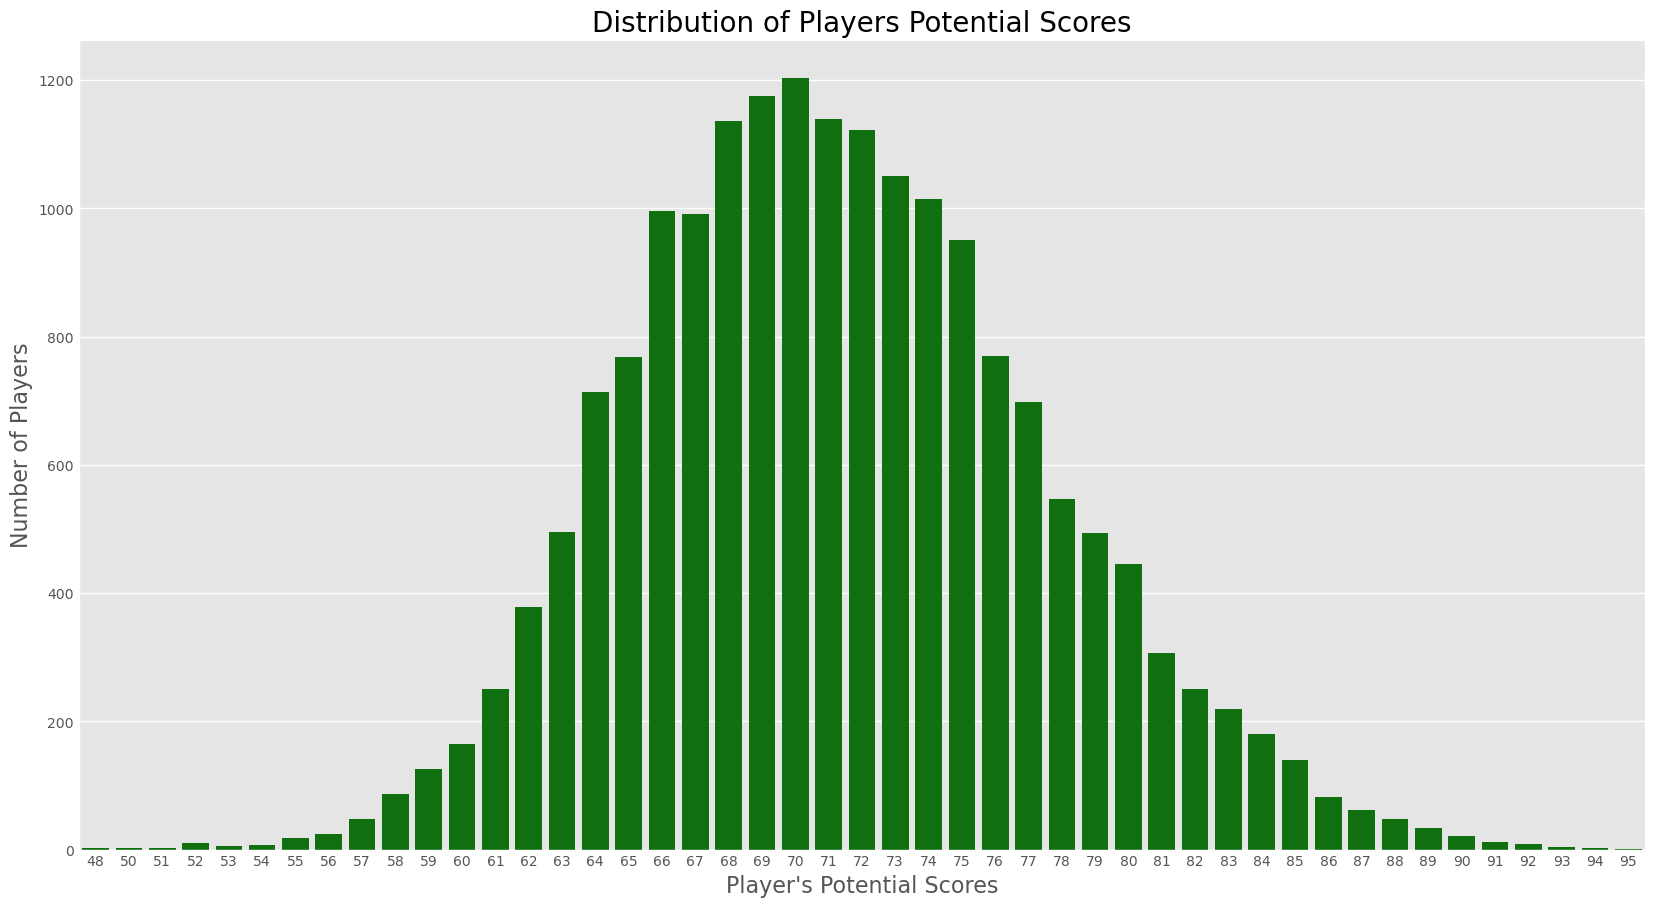

In [59]:
x = df['Potential']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Potential Scores', fontsize = 20)
plt.show()
#easiest way are illustrated below, in sigle line of command

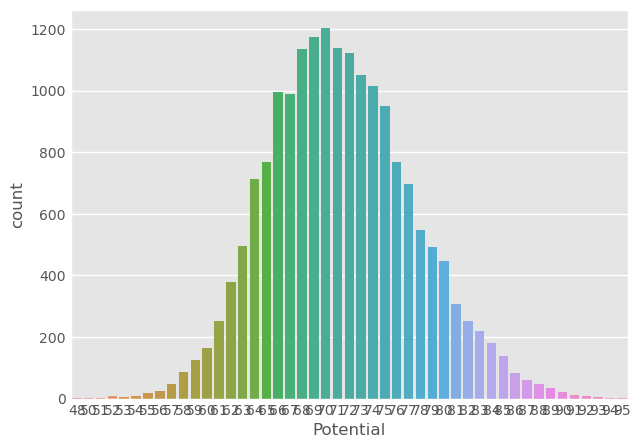

In [58]:
sns.countplot(x ='Potential', data = df);


### Overall Score of the Players


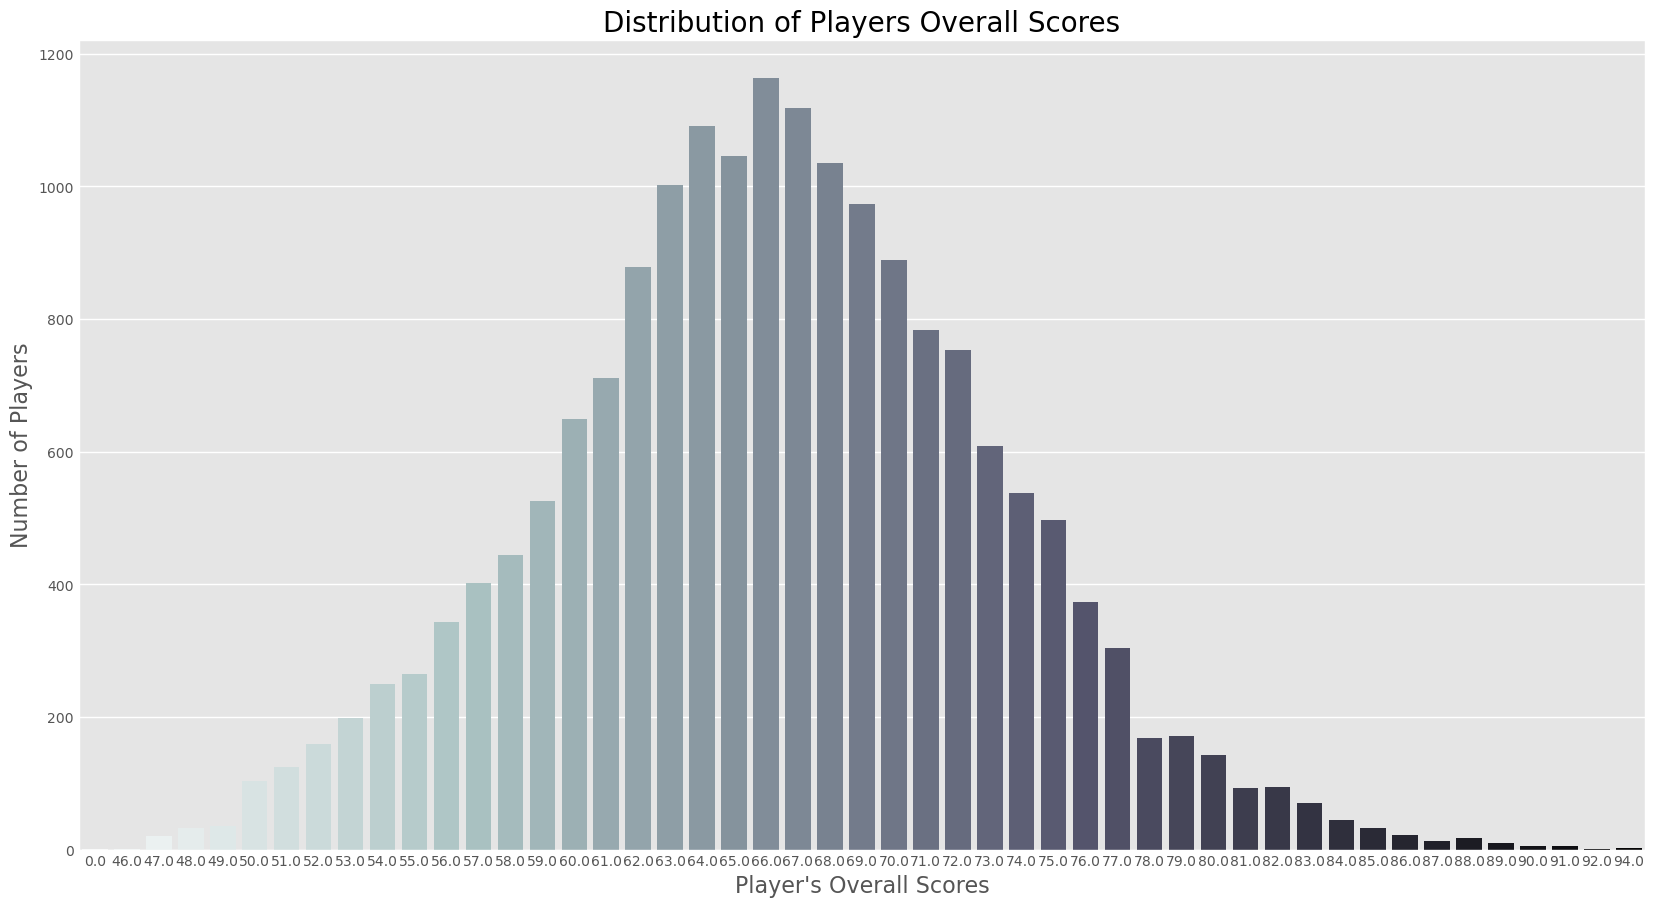

In [68]:
x = df['Overall']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, palette='bone_r')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Overall Scores', fontsize = 20)
plt.show()
#easiest way are illustrated below, in sigle line of command, Try this line at your own 
# sns.countplot("Overall", palette='rocket' , data= df)'''